#### Feed Forward Network

In [27]:
import numpy as np
from copy import deepcopy

In [23]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = inputs@weights[0] + weights[1]
    hidden = 1/(1+np.exp(-1*pre_hidden))
    pred_out = hidden@weights[2] + weights[3]
    mean_squared_error = np.mean(np.square(pred_out-outputs))
    
    return mean_squared_error

In [26]:
#activation function in  code
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
    return np.where(x>0, x, 0)

def linear(x):
    return x

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

#loss function in code
#MSE
def mse(x,y):
    return np.mean(np.square(x-y))

def mae(x,y):
    return np.mean(np.abs(x-y))

def bce(p,y):
    return -np.mean(np.sum((y*np.log(p) + (1-y)* np.log(1-p))))

def categoical_cross_entropy(p,y):
    return -np.mean(np.sum(y*np.log(p)))




In [76]:
def update_weights(inputs,outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layers in enumerate(original_weights):
        for index, weight in np.ndenumerate(layers):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/0.0001
            
            updated_weights[i][index] -= grad*lr
            
    return updated_weights, original_loss    

In [77]:
x = np.array([[1,1]])
y = np.array([[0]])

In [78]:
W = [
np.array([[-0.0053, 0.3793],
[-0.5820, -0.5204],
[-0.2723, 0.1896]], dtype=np.float32).T,
np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T,
np.array([-0.5516], dtype=np.float32)
]

In [79]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x, y ,W, 0.01)
    losses.append(loss)

In [80]:
feed_forward(x,y,W)

0.0003054840680033747

Text(0, 0.5, 'Loss')

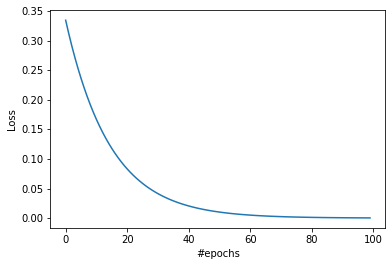

In [82]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("#epochs")
plt.ylabel("Loss")

In [83]:
# Understanding the impact of the learning rate

In [84]:
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

In [93]:
def feed_forward(inputs, outputs, weights):
    pred_out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(pred_out \
    - outputs))
    return mean_squared_error

In [94]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs,original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, \
            temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

Text(0, 0.5, 'Weight value')

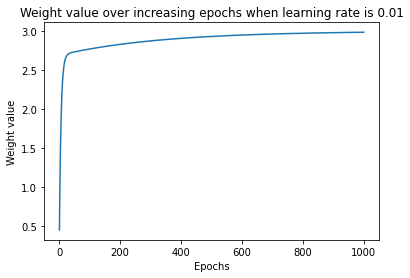

In [105]:
W = [np.array([[0]], dtype=np.float32),
np.array([[0]], dtype=np.float32)]

weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 1001)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing \
epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

In [106]:
feed_forward(x,y,W)

0.00035448306778208816

Text(0, 0.5, 'Weight value')

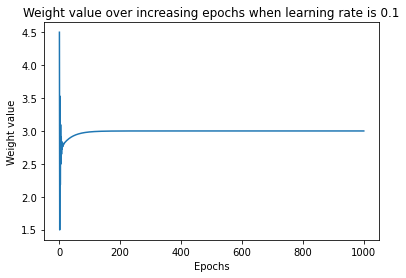

In [109]:
W = [np.array([[0]], dtype=np.float32),
np.array([[0]], dtype=np.float32)]

weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 1001)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing \
epochs when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

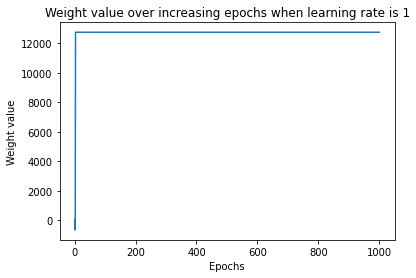

In [110]:
W = [np.array([[0]], dtype=np.float32),
np.array([[0]], dtype=np.float32)]

weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 1001)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing \
epochs when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')